In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
f=input("Enter File Path: ")

Enter File Path: /content/Hallucination-Dataset-400-Samples.csv


In [124]:
df=pd.read_csv(f)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Context        402 non-null    object 
 1   Question       401 non-null    object 
 2   Answer         402 non-null    object 
 3   Hallucination  402 non-null    int64  
 4   Prediction     0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 15.8+ KB


In [126]:
df.shape

(402, 5)

In [127]:
df.isnull().sum()

Context            0
Question           1
Answer             0
Hallucination      0
Prediction       402
dtype: int64

In [128]:
df.isnull().sum().sum()

403

In [129]:
df.head()

,Context,Question,Answer,Hallucination,Prediction
0,The revolutionary CoolMOS™ power MOSFET family...,What is the purpose of Infineon’s Engine Manag...,Minimizing layout resistance and maximizing co...,1,NaN
1,Magnetic switches and magnetic latches operate...,What scenario did the algorithms generate?,There are no different types of magnetic senso...,1,NaN
2,Serial Flash Discoverable Parameters (SFDP) is...,What is the standard number for Serial Flash D...,The standard number for SFDP is JESD2163,0,NaN
3,"EiceDRIVERTM 2EDN family is known for fast, pr...",What makes the 2EDN family a new reference in ...,The 2EDN family features 4 V and 8 V UVLO for ...,0,NaN
4,The ICL88xx family of single-stage flyback con...,How many I/O lanes does Dual Quad I/O SPI supp...,Energy harvesting,1,NaN


In [130]:
df.tail()

,Context,Question,Answer,Hallucination,Prediction
397,While exploring AI-driven applications in semi...,What are the benefits of a consistent pinout s...,The AI system projected a scenario where semic...,1,NaN
398,The 2ED132x family consists of four 1200-V SOI...,"What does the 2ED132x family offer, and what a...",Four 1200-V SOI gate drivers with 2.3 A output...,0,NaN
399,our complete solutions include all the buildin...,How does your solution contribute to faster ma...,Our solution accelerates market entry by provi...,0,NaN
400,6EDL7141 is Infineon’s latest 3-phase motor c...,What are the ideal applications for the 6EDL71...,Suitable for underwater applications.,1,NaN
401,"SDARS, broadcasting in the S-band from 2320 – ...",What is the frequency range of SDARS satellite...,2300 – 2350 MHz,1,NaN


In [131]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Context"]=le.fit_transform(df["Context"])
df["Question"]=le.fit_transform(df["Question"])
df["Answer"]=le.fit_transform(df["Answer"])

In [132]:
df.head()

,Context,Question,Answer,Hallucination,Prediction
0,265,306,218,1,NaN
1,163,361,357,1,NaN
2,195,323,347,0,NaN
3,40,349,285,0,NaN
4,227,45,87,1,NaN


In [133]:
df.tail()

,Context,Question,Answer,Hallucination,Prediction
397,288,88,288,1,NaN
398,203,145,104,0,NaN
399,295,38,237,0,NaN
400,1,96,3,1,NaN
401,191,237,13,1,NaN


In [134]:
target=df["Hallucination"]
target.shape

(402,)

In [135]:
data=df.drop(["Hallucination",'Prediction'],axis=1)

In [136]:
data.head()

,Context,Question,Answer
0,265,306,218
1,163,361,357
2,195,323,347
3,40,349,285
4,227,45,87


In [137]:
target.head()

0    1
1    1
2    0
3    0
4    1
Name: Hallucination, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [139]:
x_train.shape

(281, 3)

In [140]:
x_test.shape

(121, 3)

In [141]:
y_train.shape

(281,)

In [142]:
y_test.shape

(121,)

In [143]:
x_train.describe()

,Context,Question,Answer
count,281.000000,281.000000,281.000000
mean,142.544484,200.395018,202.765125
std,82.186410,112.793572,114.164676
min,0.000000,0.000000,0.000000
25%,76.000000,104.000000,108.000000
50%,138.000000,202.000000,205.000000
75%,206.000000,296.000000,302.000000
max,295.000000,396.000000,395.000000


In [144]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [145]:
type(x_train_sc)

numpy.ndarray

In [146]:
type(x_test_sc)

numpy.ndarray

In [147]:
x_train_sc=pd.DataFrame(x_train_sc)

In [148]:
x_test_sc=pd.DataFrame(x_test_sc)

In [149]:
x_train_sc.describe()

,0,1,2
count,2.810000e+02,2.810000e+02,2.810000e+02
mean,1.485565e-16,-1.137880e-16,-1.169488e-16
std,1.001784e+00,1.001784e+00,1.001784e+00
min,-1.737499e+00,-1.779823e+00,-1.779245e+00
25%,-8.111220e-01,-8.561392e-01,-8.315549e-01
50%,-5.539349e-02,1.425476e-02,1.961082e-02
75%,7.734701e-01,8.491224e-01,8.707766e-01
max,1.858306e+00,1.737280e+00,1.686843e+00


In [150]:
x_train_sc.head()

,0,1,2
0,-1.237743,1.355372,-1.050928
1,-0.055393,1.248793,0.195109
2,0.017742,-0.563047,0.905876
3,-0.725798,0.831359,-0.234861
4,-0.957392,-1.584428,-1.533547


In [151]:
x_train_sc.columns=[x_train.columns]

In [152]:
x_train_sc.head()

,Context,Question,Answer
0,-1.237743,1.355372,-1.050928
1,-0.055393,1.248793,0.195109
2,0.017742,-0.563047,0.905876
3,-0.725798,0.831359,-0.234861
4,-0.957392,-1.584428,-1.533547


In [153]:
sc_train_acc=[]
sc_test_acc=[]
algo=["Perceptron", "Logistic Regression", "Support Vector Classifier", "K-Nearest Neighbor", "Naive Bayes", "Decision Tree"]

In [154]:
#Perceptron
from sklearn.linear_model import Perceptron
p1=Perceptron()
p1.fit(x_train_sc, y_train)

Perceptron()

In [155]:
from sklearn.metrics import accuracy_score
x_train_pred=p1.predict(x_train_sc)
x_test_pred=p1.predict(x_test_sc)
sc_train_acc.append(accuracy_score(x_train_pred, y_train))
sc_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.5088967971530249
Testing Accuracy: 0.45454545454545453


In [156]:
p2=Perceptron(penalty="l1")
p2.fit(x_train_sc, y_train)

Perceptron(penalty='l1')

In [157]:
x_train_pred=p2.predict(x_train_sc)
x_test_pred=p2.predict(x_test_sc)
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.6298932384341637
Testing Accuracy: 0.5371900826446281


In [158]:
p3=Perceptron(penalty="l2")
p3.fit(x_train_sc, y_train)

Perceptron(penalty='l2')

In [159]:
x_train_pred=p3.predict(x_train_sc)
x_test_pred=p3.predict(x_test_sc)
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.49466192170818507
Testing Accuracy: 0.4628099173553719


In [160]:
p4=Perceptron(penalty="elasticnet")
p4.fit(x_train_sc, y_train)

Perceptron(penalty='elasticnet')

In [161]:
x_train_pred=p4.predict(x_train_sc)
x_test_pred=p4.predict(x_test_sc)
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.4875444839857651
Testing Accuracy: 0.4297520661157025


In [162]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_sc, y_train)

LogisticRegression()

In [163]:
x_train_pred=lr.predict(x_train_sc)
x_test_pred=lr.predict(x_test_sc)
sc_train_acc.append(accuracy_score(x_train_pred, y_train))
sc_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.6298932384341637
Testing Accuracy: 0.5371900826446281


In [164]:
#Support Vector Classifier
from sklearn.svm import SVC
svc1=SVC() #Default kernel="rbf"
svc1.fit(x_train_sc, y_train)

SVC()

In [165]:
x_train_pred=svc1.predict(x_train_sc)
x_test_pred=svc1.predict(x_test_sc)
sc_train_acc.append(accuracy_score(x_train_pred, y_train))
sc_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.6512455516014235
Testing Accuracy: 0.49586776859504134


In [166]:
svc2=SVC(kernel="linear")
svc2.fit(x_train_sc, y_train)

SVC(kernel='linear')

In [167]:
x_train_pred=svc2.predict(x_train_sc)
x_test_pred=svc2.predict(x_test_sc)
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.6298932384341637
Testing Accuracy: 0.5371900826446281


In [168]:
svc3=SVC(kernel="poly")
svc3.fit(x_train_sc, y_train)

SVC(kernel='poly')

In [169]:
x_train_pred=svc3.predict(x_train_sc)
x_test_pred=svc3.predict(x_test_sc)
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.6298932384341637
Testing Accuracy: 0.5371900826446281


In [170]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier() #Default Neighbors=5
knn1.fit(x_train_sc, y_train)

KNeighborsClassifier()

In [171]:
x_train_pred=knn1.predict(x_train_sc)
x_test_pred=knn1.predict(x_test_sc)
sc_train_acc.append(accuracy_score(x_train_pred, y_train))
sc_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.6868327402135231
Testing Accuracy: 0.512396694214876


In [172]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_sc, y_train)

GaussianNB()

In [173]:
x_train_pred=nb.predict(x_train_sc)
x_test_pred=nb.predict(x_test_sc)
sc_train_acc.append(accuracy_score(x_train_pred, y_train))
sc_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.6370106761565836
Testing Accuracy: 0.5454545454545454


In [174]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier() # Default gini
dt1.fit(x_train_sc, y_train)

DecisionTreeClassifier()

In [175]:
x_train_pred=dt1.predict(x_train_sc)
x_test_pred=dt1.predict(x_test_sc)
sc_train_acc.append(accuracy_score(x_train_pred, y_train))
sc_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.5454545454545454


In [176]:
dt2=DecisionTreeClassifier(criterion="entropy")
dt2.fit(x_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy')

In [177]:
x_train_pred=dt2.predict(x_train_sc)
x_test_pred=dt2.predict(x_test_sc)
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.5537190082644629


In [178]:
from sklearn.metrics import f1_score, confusion_matrix
print(f1_score(x_train_pred, y_train, average="weighted"))
print(confusion_matrix(x_train_pred, y_train))

1.0
[[104   0]
 [  0 177]]


In [179]:
c=["yellow", "orange"]

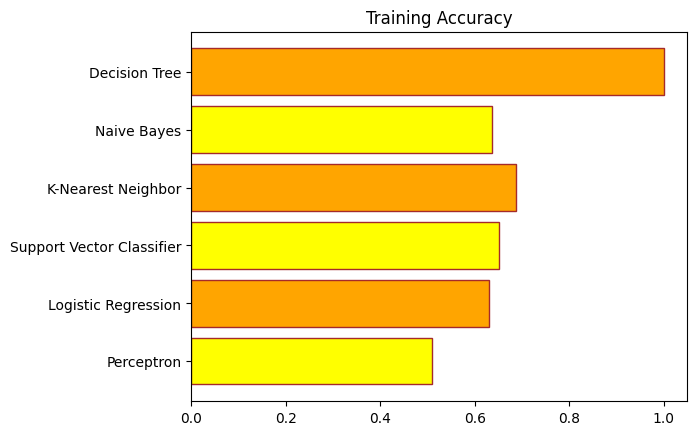

In [180]:
plt.barh(algo, sc_train_acc, color=c, edgecolor="brown")
plt.title("Training Accuracy")
plt.show()

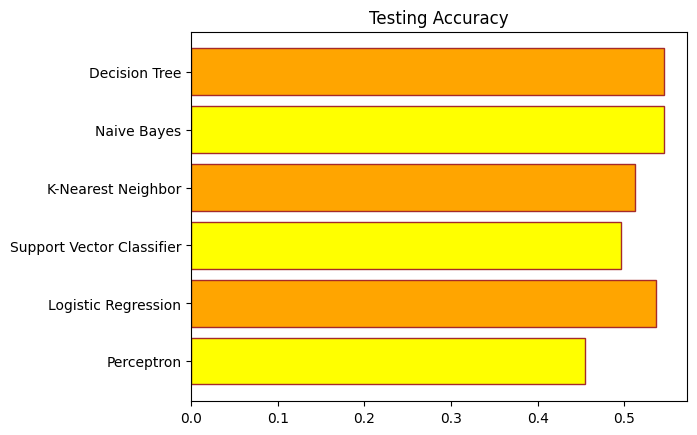

In [181]:
plt.barh(algo, sc_test_acc, color=c, edgecolor="brown")
plt.title("Testing Accuracy")
plt.show()